In [1]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits
import glob
import pandas as pd
import xarray as xr 
import cartopy
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
import scipy.stats as stats 
import scipy as sp
from scipy import signal
import os

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
# from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
#                                 LatitudeLocator, LongitudeLocator)
# import imageio

In [2]:
loc_list = ['Sahara','Oregon','NewGuinea','Amazon','Siberia']

In [3]:
ds_dict = {}

for loc in loc_list:
    print(loc)
    
    ds_temp = xr.open_dataset('data/location_files/'+loc+'_surface_energy_fluxes_CESM2_1pctCO2_0001-0150.nc')

        
    ds_dict[loc] = ds_temp.copy()
    
    del ds_temp

Sahara
Oregon
NewGuinea
Amazon
Siberia


In [4]:

attribute_dict = {}
attribute_dict['color'] = {}
attribute_dict['name'] = {}


attribute_dict['color']['rsds']='gold'
attribute_dict['color']['rsus']='black'
attribute_dict['color']['rsns']='orange'
attribute_dict['color']['rlds']='purple'
attribute_dict['color']['rlus']='violet'
attribute_dict['color']['hfls']='blue'
attribute_dict['color']['hfss']='red'
attribute_dict['color']['ts']='black'


attribute_dict['name']['rsds']='Incident Shortwave Radiation'
attribute_dict['name']['rsus']='Reflected Shortwave Radiation'
attribute_dict['name']['rsns']='Absorbed Shortwave Radiation'
attribute_dict['name']['rlds']='Downwards Longwave Radiation'
attribute_dict['name']['rlus']='Upwards Longwave Radiation'
attribute_dict['name']['hfls']='Latent Heat'
attribute_dict['name']['hfss']='Sensible Heat'
attribute_dict['name']['ts']='Surface Temperature'


## Plot the locations of our data on a map:

The location in the Sahara and the location near Corvallis are shown on a world map. 

If you want to explore the data for the other three locations (Amazon, NewGuinea, Siberia), you can uncomment the commented-out lines of code below (lines staring with `#`) to get them to show up on the map, too! 

/Users/mlague/opt/anaconda3/envs/SurfaceEnergyEnv/lib/python3.9/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


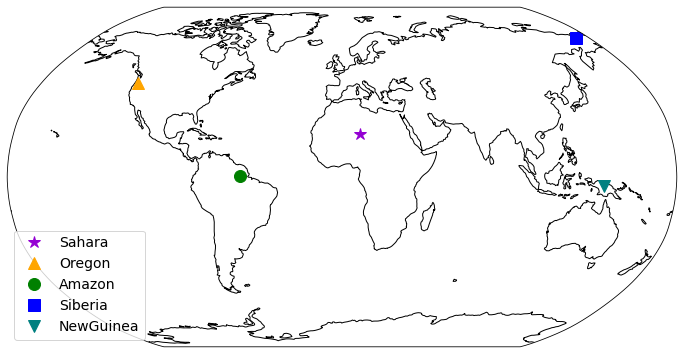

In [5]:
fig = plt.figure(figsize=(12,8))

ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
ax.set_global()

plt.plot(ds_dict['Sahara'].lon.values,ds_dict['Sahara'].lat.values,'*',markersize=12,color='darkviolet',label='Sahara',transform=ccrs.PlateCarree())
plt.plot(ds_dict['Oregon'].lon.values,ds_dict['Oregon'].lat.values,'^',markersize=12,color='orange',label='Oregon',transform=ccrs.PlateCarree())
plt.plot(ds_dict['Amazon'].lon.values,ds_dict['Amazon'].lat.values,'o',markersize=12,color='green',label='Amazon',transform=ccrs.PlateCarree())
plt.plot(ds_dict['Siberia'].lon.values,ds_dict['Siberia'].lat.values,'s',markersize=12,color='blue',label='Siberia',transform=ccrs.PlateCarree())
plt.plot(ds_dict['NewGuinea'].lon.values,ds_dict['NewGuinea'].lat.values,'v',markersize=12,color='teal',label='NewGuinea',transform=ccrs.PlateCarree())


plt.legend(fontsize=14)

plt.show()
plt.close()

# Plot bar graphs of the breakdown of the terms of the surface energy budget for each location

We'll look at the average of the first 10 years of the simulation here; later, we'll look how the surface fluxes are chaning in time (and thus with increasing atmospheric co2)

Note that here we're considering netSW = (SW down) - (SW reflected) as one of the "energy into the land surface" terms. Alternatively, we could just use SW down, and use SW reflected as one of the terms out of the land surface. How much SW gets reflected is controlled by the *albedo* of the land surface. Albedo can change through time with changes in land cover, and even changes in plant properties. However, both SW down and SW up are large fluxes, so sometimes it is easier to visualize the SW fluxes just by considering how much the surface absorbed (down - up). 


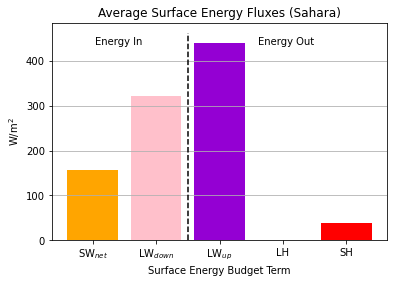

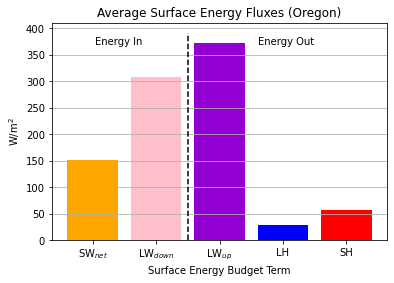

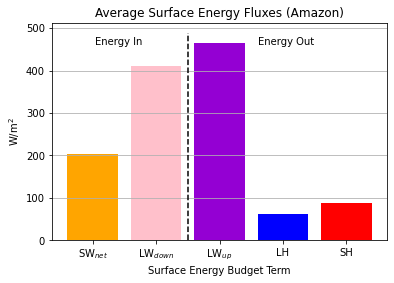

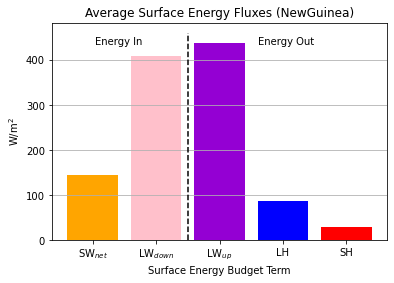

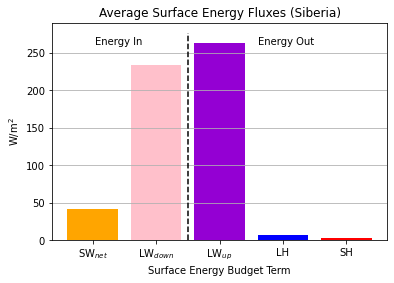

In [54]:

for loc in ['Sahara','Oregon','Amazon','NewGuinea','Siberia']:

    ds = ds_dict[loc].sel(year=slice(1,10)).mean('year')

    # energy into the land surface:
    net_SW = float((ds['rsds'] - ds['rsus']).values)
    LW_down = float(ds['rlds'].values)
    
    # energy out of the land surface: 
    LW_up = float(ds['rlus'].values)
    LH = float(ds['hfls'].values)
    SH = float(ds['hfss'].values)
    
    labels = ['SW$_{net}$', 'LW$_{down}$', 'LW$_{up}$', 'LH', 'SH']
    values = [net_SW,LW_down,LW_up,LH,SH]
    colors = ['orange','pink','darkviolet','blue','red']
    
    y_pos = np.arange(len(values))

    # Create bars
    plt.bar(y_pos, values,color=colors)

    # Create names on the x-axis
    plt.xticks(y_pos, labels)
    
    
    ylim = plt.ylim()
    plt.plot([(y_pos[2] + y_pos[1])/2 , (y_pos[2] + y_pos[1])/2 ],
             [ylim[0], ylim[1]],
             'k--')
    
    ax = plt.gca()
    plt.text(1/5,0.9,'Energy In',ha='center',transform=ax.transAxes)
    plt.text(3.5/5,0.9,'Energy Out',ha='center',transform=ax.transAxes)
    

    
    plt.title('Average Surface Energy Fluxes (%s)'%loc)
    
    plt.ylabel('W/m$^2$')
    plt.xlabel('Surface Energy Budget Term')
    
    plt.grid(':',zorder=-5,axis='y')
    
    plt.show()
    
    plt.close()
    
    
    

In [7]:
ds_dict[loc]

<xarray.Dataset>
Dimensions:   (year: 150, nbnd: 2, plev: 19)
Coordinates:
    lat       float64 20.26
    lon       float64 10.0
  * plev      (plev) float64 1e+05 9.25e+04 8.5e+04 7e+04 ... 1e+03 500.0 100.0
  * year      (year) int64 1 2 3 4 5 6 7 8 9 ... 143 144 145 146 147 148 149 150
Dimensions without coordinates: nbnd
Data variables: (12/18)
    rlds      (year) float32 ...
    lat_bnds  (year, nbnd) float64 ...
    lon_bnds  (year, nbnd) float64 ...
    rlus      (year) float32 ...
    rsds      (year) float32 ...
    rsus      (year) float32 ...
    ...        ...
    rsdt      (year) float32 ...
    hfls      (year) float32 ...
    hfss      (year) float32 ...
    ua        (year, plev) float32 ...
    va        (year, plev) float32 ...
    rsns      (year) float32 ...
Attributes: (12/46)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  182500.0
    case_id:                58
    ...                     ...
    table_id:               Amon
    tracking_id:            hdl:21.14100/df43da1f-2892-4b3c-a8f4-e25257317928
    variable_id:            rlds
    variant_info:           CMIP6 CESM2 1pctCO2 experiment with interactive a...
    variant_label:          r1i1p1f1
    location:               Sahara

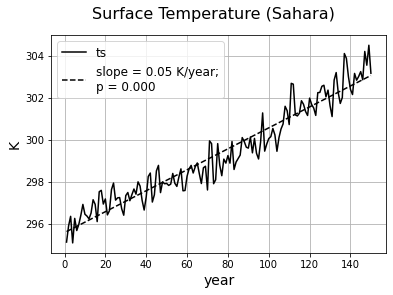

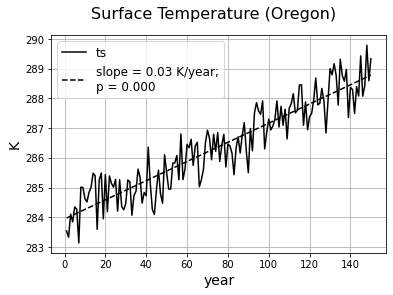

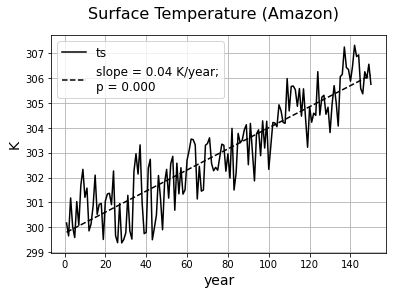

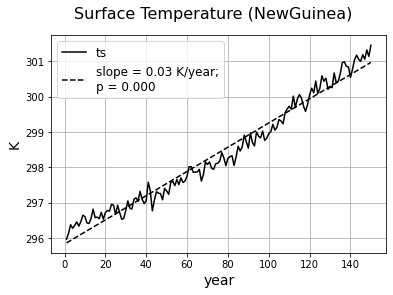

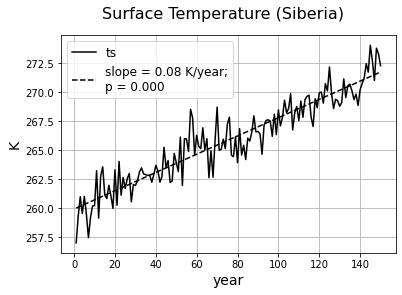

In [6]:


for loc in ['Sahara','Oregon','Amazon','NewGuinea','Siberia']:

    ds = ds_dict[loc]

    years = ds.year.values


    fig, axes = plt.subplots(1,1,figsize=(6,4))

    for var in ['ts',]:

        if var in ['rsds','rsus','rsns','rlds','rlus','hfls','hfss']:
            units = 'W/m$^2$'
        elif var in ['ts']:
            units = 'K'
        else:
            units = ds_dict[loc][var].units

        ax = axes

        slope, intercept, r, p, se = stats.linregress(ds.year,ds[var])

        ax.plot(ds.year.values,ds[var],color=attribute_dict['color'][var],label=var)
        ax.plot(ds.year.values,intercept + ds.year.values*slope,'--',color=attribute_dict['color'][var],label='slope = %1.2f %s/year;\np = %1.3f'%(slope,units,p))

        ax.legend(fontsize=12)
        ax.grid()
        

        plt.xlabel('year',fontsize=14)
        plt.ylabel(units,fontsize=14)


    fig.suptitle('Surface Temperature (%s)'%loc,fontsize=16)

    plt.show()
    plt.close()


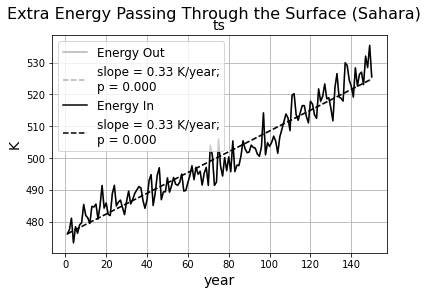

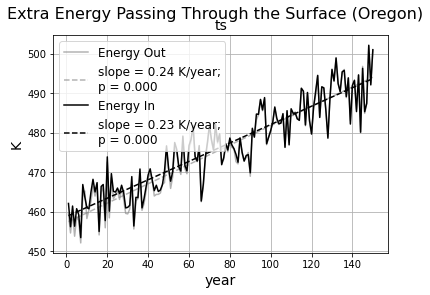

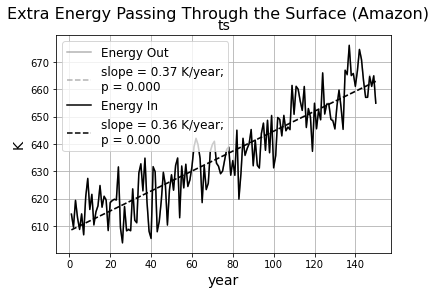

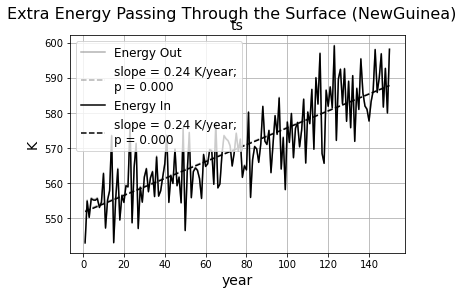

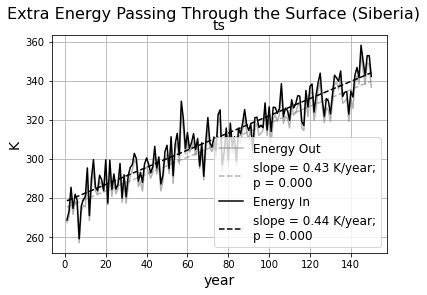

In [8]:
run = '1pctCO2'

for loc in ['Sahara','Oregon','Amazon','NewGuinea','Siberia']:
    

    ds = ds_dict[loc]

    years = ds.year.values


    # fig = plt.subplots(figsize=(16,8))
    fig, _axes = fig, axes = plt.subplots(1,1,figsize=(6,4))
#     axes = _axes.flatten()

#     for var in ['Ein','Eout','Eres']:

    if var in ['rsds','rsus','rsns','rlds','rlus','hfls','hfss','Ein','Eout','Eres']:
        units = 'W/m$^2$'
    elif var in ['ts']:
        units = 'K'
    else:
        units = ds_dict[loc].units

    ax = _axes


    energy_in = ds['rsns'] + ds['rlds']

    energy_out = ds['rlus'] + ds['hfls'] + ds['hfss']

#     residual = ds['rsns'] + ds['rlds'] - ( ds['rlus'] + ds['hfls'] + ds['hfss'] )

    data = energy_out
    slope, intercept, r, p, se = stats.linregress(ds.year,data)
    ax.plot(ds.year.values,data,color='gray',label='Energy Out',alpha=0.6)
    ax.plot(ds.year.values,intercept + ds.year.values*slope,'--',color='gray',alpha=0.6,label='slope = %1.2f %s/year;\np = %1.3f'%(slope,units,p))

    data = energy_in
    slope, intercept, r, p, se = stats.linregress(ds.year,data)
    ax.plot(ds.year.values,data,color='k',label='Energy In')
    ax.plot(ds.year.values,intercept + ds.year.values*slope,'--',color='k',label='slope = %1.2f %s/year;\np = %1.3f'%(slope,units,p))


#     data = residual
#     slope, intercept, r, p, se = stats.linregress(ds.year,data)
#     ax.plot(ds.year.values,data,':',color='gray',label='Residual',alpha=0.5)
#     ax.plot(ds.year.values,intercept + ds.year.values*slope,'--',color='k',label='slope = %1.2f %s/year;\np = %1.3f'%(slope,units,p))


    ax.legend(fontsize=12)
    ax.grid()

    ax.set_title(var,fontsize=14)

    plt.xlabel('year',fontsize=14)
    plt.ylabel(units,fontsize=14)


    fig.suptitle('Extra Energy Passing Through the Surface (%s)'%loc,fontsize=16)

    plt.show()
    plt.close()


AttributeError: 'tuple' object has no attribute 'suptitle'

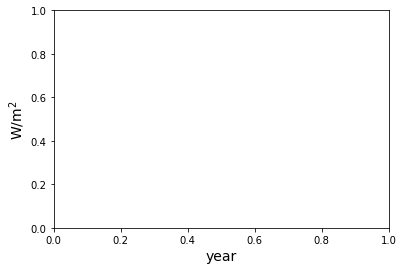

In [ ]:
# run = '1pctCO2'

# for loc in ['Sahara','Oregon','Amazon','NewGuinea','Siberia']:
    

#     ds = ds_dict[loc]

#     years = ds.year.values


#     # fig = plt.subplots(figsize=(16,8))
#     fig, _axes = plt.subplots(1,3,figsize=(16,6),)
#     axes = _axes.flatten()

#     i = 0
#     for var in ['Ein','Eout','Eres']:

#         if var in ['rsds','rsus','rsns','rlds','rlus','hfls','hfss','Ein','Eout','Eres']:
#             units = 'W/m$^2$'
#         elif var in ['ts']:
#             units = 'K'
#         else:
#             units = ds_dict[loc].units

#         ax = axes[i]
        
        
#         energy_in = ds['rsns'] + ds['rlds']

#         energy_out = ds['rlus'] + ds['hfls'] + ds['hfss']

#         residual = ds['rsns'] + ds['rlds'] - ( ds['rlus'] + ds['hfls'] + ds['hfss'] )

#         data = energy_out
#         slope, intercept, r, p, se = stats.linregress(ds.year,data)
#         ax.plot(ds.year.values,data,color='gray',label='Energy Out',alpha=0.6)
#         ax.plot(ds.year.values,intercept + ds.year.values*slope,'--',color='k',label='slope = %1.2f %s/year;\np = %1.3f'%(slope,units,p))

#         data = energy_in
#         slope, intercept, r, p, se = stats.linregress(ds.year,data)
#         ax.plot(ds.year.values,data,color='k',label='Energy In')
#         ax.plot(ds.year.values,intercept + ds.year.values*slope,'--',color='k',label='slope = %1.2f %s/year;\np = %1.3f'%(slope,units,p))

        
#         data = residual
#         slope, intercept, r, p, se = stats.linregress(ds.year,data)
#         ax.plot(ds.year.values,data,':',color='gray',label='Residual',alpha=0.5)
#         ax.plot(ds.year.values,intercept + ds.year.values*slope,'--',color='k',label='slope = %1.2f %s/year;\np = %1.3f'%(slope,units,p))

        
#         ax.legend(fontsize=12)
#         ax.grid()
        
#         ax.set_title(var,fontsize=14)

#         plt.xlabel('year',fontsize=14)
#         plt.ylabel(units,fontsize=14)

#         i = i+1

#     fig.suptitle('Extra Energy Passing Through the Surface (%s)'%loc,fontsize=16)

#     plt.show()
#     plt.close()


In [ ]:
run = '1pctCO2'

for loc in ['Sahara','Oregon','Amazon','NewGuinea','Siberia']:

    ds = ds_dict[loc]

    years = ds.year.values


    # fig = plt.subplots(figsize=(16,8))
    fig, _axes = plt.subplots(2,3,figsize=(16,8))
    axes = _axes.flatten()

    i = 0
    for var in ['rsns','rsus','hfss','rlds','rlus','hfls',]:

        if var in ['rsds','rsus','rsns','rlds','rlus','hfls','hfss']:
            units = 'W/m$^2$'
        elif var in ['ts']:
            units = 'K'
        else:
            units = ds_dict[loc][var].units

        ax = axes[i]

        slope, intercept, r, p, se = stats.linregress(ds.year,ds[var])

        ax.plot(ds.year.values,ds[var],color=attribute_dict['color'][var],label=var)
        ax.plot(ds.year.values,intercept + ds.year.values*slope,'--',color=attribute_dict['color'][var],label='slope = %1.2f %s/year;\np = %1.3f'%(slope,units,p))

        ax.legend(fontsize=12)
        ax.grid()
        
        ax.set_title(attribute_dict['name'][var],fontsize=14)

        plt.xlabel('year',fontsize=14)
        plt.ylabel(units,fontsize=14)

        i = i+1

    fig.suptitle('Surface Energy Fluxes (%s)'%loc,fontsize=16)

    plt.show()
    plt.close()


In [16]:
ds_dict[run]['Amon']['rsds'].units

'W m-2'

In [18]:
ds_dict[run]['Amon'].groupby('time.year').mean('time').sel(lat=this_lat,method='nearest').sel(lon=this_lon,method='nearest')['rsds']

<xarray.DataArray 'rsds' (year: 150)>
dask.array<getitem, shape=(150,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    lat      float64 44.76
    lon      float64 236.2
  * year     (year) int64 1 2 3 4 5 6 7 8 9 ... 143 144 145 146 147 148 149 150

In [ ]:
### run = '1pctCO2'

for loc in ['Sahara','Corvallis']:
    
    if loc=='Sahara':
        this_lat = 20.0
        this_lon = 10.0
    elif loc=='Corvallis':
        this_lat = 44.6
        this_lon = 236.7
    
    ds = ds_dict[run]['Amon'].groupby('time.year').mean('time').sel(lat=this_lat,method='nearest').sel(lon=this_lon,method='nearest')
    
    years = ds.year.values
    
    slope, intercept, r, p, se = stats.linregress(ds.year,ds['rsds'])
    
    
    plt.plot(ds.year.values,ds['rsds'],'k',label='rsds')
    plt.plot(ds.year.values,ds['rlds'],'purple',label='rlds')
    plt.legend()
    plt.title('Energy in at surface, %s'%loc)
    plt.show()
    plt.close()
    
    
    
    plt.plot(ds.year.values,ds['rsus'],'k',label='rsus')
    plt.plot(ds.year.values,ds['rlus'],'purple',label='rlus')
    plt.plot(ds.year.values,ds['hfls'],'b',label='hfls')
    plt.plot(ds.year.values,ds['hfss'],'r',label='hfss')
    plt.legend()
    plt.title('Energy out at surface, %s'%loc)
    plt.show()
    plt.close()
    
    plt.plot(ds.year.values,ds['rsds']-ds['rsus'],'k',label='Net SW absorbed')
    plt.plot(ds.year.values,ds['rlds']-ds['rlus'],'purple',label='Net LW (positive up)')
    plt.plot(ds.year.values,ds['hfls'],'b',label='hfls')
    plt.plot(ds.year.values,ds['hfss'],'r',label='hfss')
    plt.legend()
    plt.title('Energy at surface, %s'%loc)
    plt.show()
    plt.close()
    
    plt.plot(ds.year.values,ds['rlus'],'pink',label='rlus')
    plt.plot(ds.year.values,ds['rlds'],'purple',label='rlds')
    plt.legend()
    plt.title('LW at surface, %s'%loc)
    plt.show()
    plt.close()
    
    plt.plot(ds.year.values,ds['rsdt'],'k',label='rsdt (incoming SW)')
    plt.plot(ds.year.values,ds['rsut'],'r',label='rsut (outgoing SW)')
    plt.plot(ds.year.values,ds['rsdt']-ds['rsut'],'g',label='rsdt-rsut (net SW absorbed)')
    plt.plot(ds.year.values,ds['rlut'],'purple',label='rlut (lw out at toa)')
    plt.legend()
    plt.title('Energy in & out at top of atmosphere, %s'%loc)
    plt.show()
    plt.close()
    
    plt.plot(ds.year.values,ds['rlut'],'purple',label='rlut (lw out at toa)')
    plt.legend()
    plt.title('LW out at top of atmosphere, %s'%loc)
    plt.show()
    plt.close()
    

annually averaged, Ein = Eout over land surfaces. This isn't true over hte ocean, which (a) has a large heat capacity and (b) can move energy laterally. While Ein=Eout is true globally at the top of the atmosphere *when the planet is in equilibrium* (ie not being actively heated or cooled, which, in the case of increased CO2, it actually takes a while to reach equilibrium after CO2 levels flatten out), Ein does NOT have to equal Eout at any giving location, because the atmosphere can move energy around. E.g. over the Sahara, we see more LW is emitted at the TOA than SW is absorbed - this is because the Sahara is really good at radiating energy (there isn't much "stuff" in the way - clouds, water vapour etc). But, the surface energy budget over the Sahara (land) is closed, just like it is at Corvallis. 

In [90]:
# ds_summer = (ds_1pctco2.where(ds_1pctco2['time'].dt.month.isin([6,7,8]),drop=True)).groupby('time.year').mean('time')
# ds_albedo
ds_summer_alb = (ds_albedo.where(ds_albedo['time'].dt.month.isin([6,]),drop=True)).groupby('time.year').mean('time')
ds_summer_albc = (ds_albedoc.where(ds_albedoc['time'].dt.month.isin([6,]),drop=True)).groupby('time.year').mean('time')
ds_summer_lai = (ds_lai.where(ds_lai['time'].dt.month.isin([6,]),drop=True)).groupby('time.year').mean('time')
ds_summer_rsus = (ds_rsus.where(ds_rsus['time'].dt.month.isin([6,]),drop=True)).groupby('time.year').mean('time')
ds_summer_rsds = (ds_rsds.where(ds_rsds['time'].dt.month.isin([6,]),drop=True)).groupby('time.year').mean('time')
ds_summer_rsuscs = (ds_rsuscs.where(ds_rsuscs['time'].dt.month.isin([6,]),drop=True)).groupby('time.year').mean('time')
ds_summer_rsdscs = (ds_rsdscs.where(ds_rsdscs['time'].dt.month.isin([6,]),drop=True)).groupby('time.year').mean('time')
ds_summer_ts = (ds_ts.where(ds_ts['time'].dt.month.isin([6,]),drop=True)).groupby('time.year').mean('time')


/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


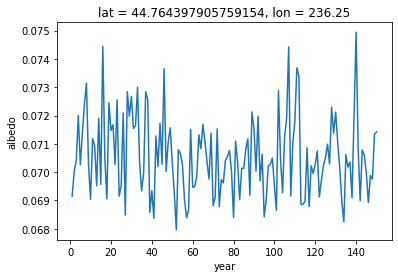

/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


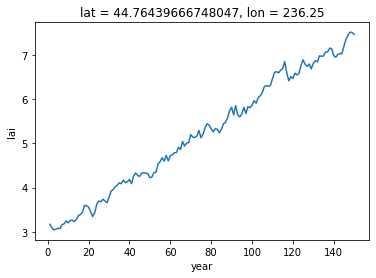

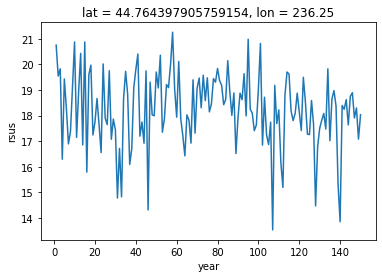

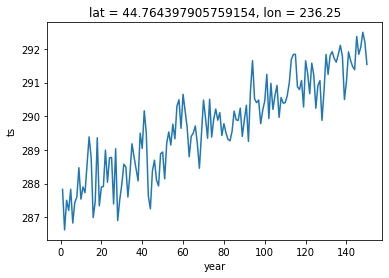

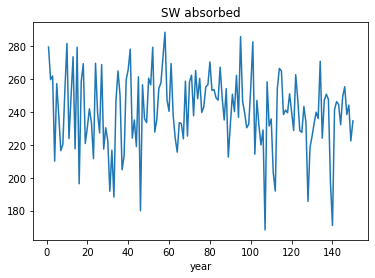

/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


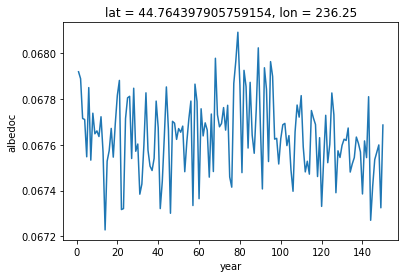

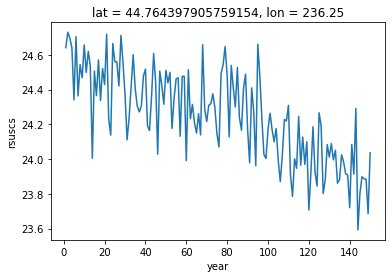

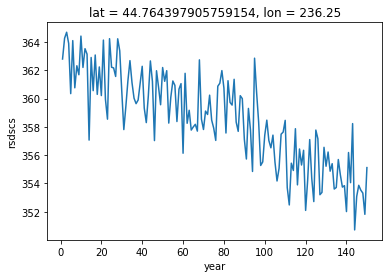

In [91]:
ds_summer_alb.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest')['albedo'].plot()
plt.show();plt.close()
ds_summer_lai.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest')['lai'].plot()
plt.show();plt.close()
ds_summer_rsus.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest')['rsus'].plot()
plt.show();plt.close()
ds_summer_ts.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest')['ts'].plot()
plt.show();plt.close()

(ds_summer_rsds['rsds'] - ds_summer_rsus['rsus']).sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest').plot()
plt.title('SW absorbed')
plt.show();plt.close()

ds_summer_albc.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest')['albedoc'].plot()
plt.show();plt.close()
ds_summer_rsuscs.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest')['rsuscs'].plot()
plt.show();plt.close()
ds_summer_rsdscs.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest')['rsdscs'].plot()
plt.show();plt.close()

/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


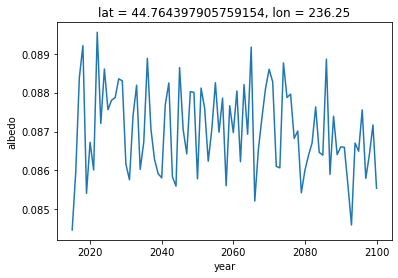

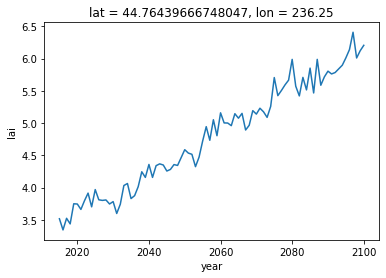

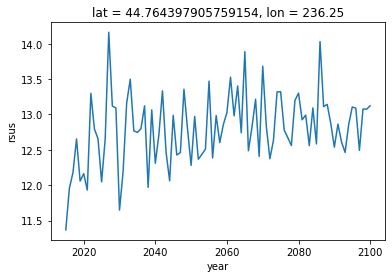

In [78]:
ds_albedo.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest').groupby('time.year').mean('time')['albedo'].plot()
plt.show();plt.close()
ds_lai.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest').groupby('time.year').mean('time')['lai'].plot()
plt.show();plt.close()
ds_rsus.sel(lat=44.5646,method='nearest').sel(lon=236.74,method='nearest').groupby('time.year').mean('time')['rsus'].plot()
plt.show();plt.close()

/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


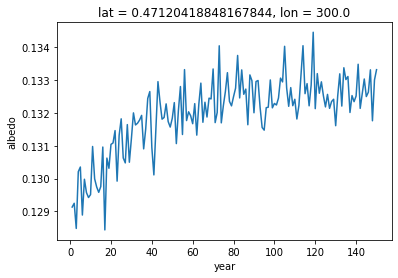

In [31]:
ds_summer_alb.sel(lat=0,method='nearest').sel(lon=300,method='nearest')['albedo'].plot()
plt.show()
plt.close()

/glade/work/mlague/python/miniconda3/envs/mland_xr/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


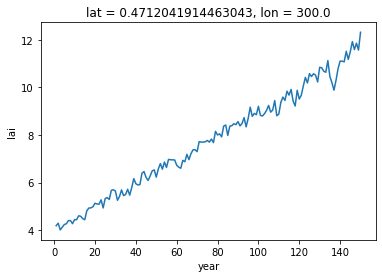

In [33]:
ds_summer_lai.sel(lat=0,method='nearest').sel(lon=300,method='nearest')['lai'].plot()
plt.show()
plt.close()

In [125]:
ds = ds_dict['1pctCO2']['Amon'].groupby('time.year').mean('time').isel(year=0)

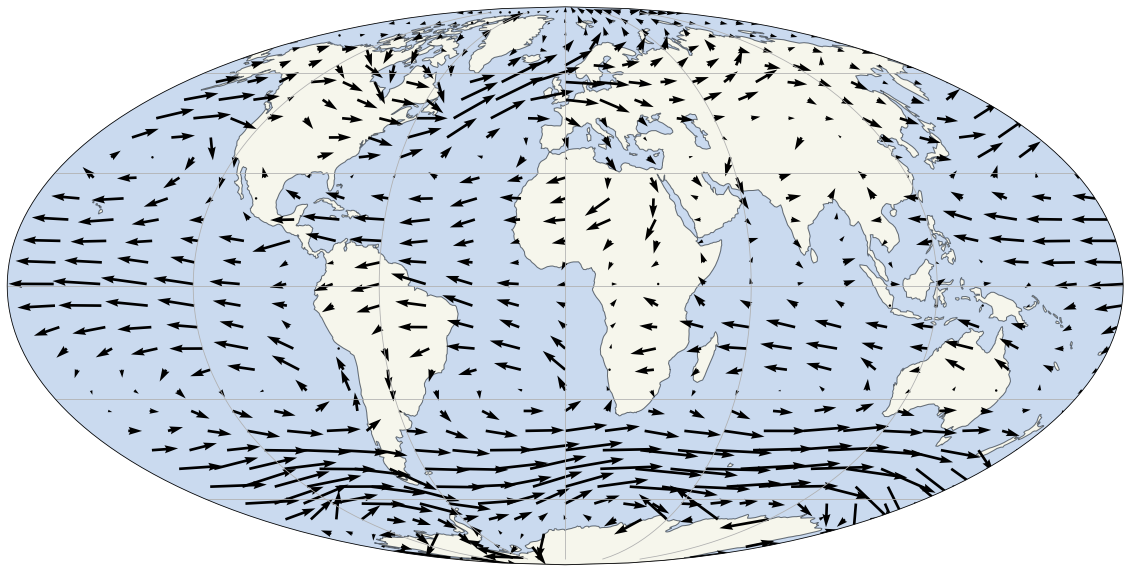

In [149]:
plt.figure(figsize=(20, 16))
ax = plt.axes(projection=ccrs.Mollweide())
# ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.OCEAN, zorder=0,alpha=0.5)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black',alpha=0.5)
ax.gridlines()

x,y = np.meshgrid(ds.lon.values,ds.lat.values)

ax.quiver(x[::6,::12], y[::6,::12], ds.ua.sel(plev=80000,method='nearest').values[::6,::12], ds.va.sel(plev=80000,method='nearest').values[::6,::12], transform=ccrs.PlateCarree())


plt.show()
plt.close()

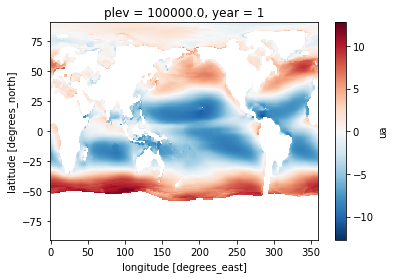

In [144]:
ds.ua.sel(plev=100000,method='nearest').plot()

In [140]:
x.shape

(192, 288)

In [141]:
ds.ua.sel(plev=100000,method='nearest').shape

(192, 288)